<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/bestresult03mae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [31]:
df=pd.read_excel("/content/pv_03.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [32]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=7)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	30
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	30
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	30
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	30
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	30
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	31
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	31
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	7
Rejected: 	31
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	5
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=7, n_estimators=80,
                                         random_state=RandomState(MT19937) at 0x7F3882EE4740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F3882EE4740, verbose=2)

In [33]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.25, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [34]:
inputs1

<KerasTensor: shape=(None, 3, 14) dtype=float32 (created by layer 'input_2')>

In [35]:
from keras import optimizers

In [36]:
opt=optimizers.Adam(learning_rate=0.003)

In [37]:
from keras.layers import Bidirectional

In [38]:
import tensorflow as tf

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.python.ops import math_ops

class HalvAdam(Adam):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.prev_gradients = None

    @tf.function
    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [math_ops.cast(x, "float32") for x in grads]

        if self.prev_gradients is not None:
            for i in range(len(grads)):
                if (grads[i] * self.prev_gradients[i] < 0):
                    self.updates[i] = self.updates[i] / 2

        self.prev_gradients = grads
        return self.updates

In [40]:
from keras import backend as K

In [41]:
import tensorflow as tf

In [42]:
def define_model():


  fe2_0 = Bidirectional(LSTM(256, activation='LeakyReLU',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(64, activation='LeakyReLU',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='LeakyReLU'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(128, activation='LeakyReLU',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='LeakyReLU',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='LeakyReLU'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([out2_1, out3_1])
  #merged3 = concatenate([out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  
 
  return model
mdl=define_model()


In [43]:
loss=[]

In [44]:
from keras.models import clone_model

In [45]:
from keras.optimizers import Adam

In [46]:
from keras.callbacks import ModelCheckpoint

In [47]:
def GlobalMinimaSearch(weights):
  if len(loss)>4:
   return
  
  initial_weights =weights
  model=clone_model(mdl)
  model.set_weights(weights)
  model.compile(optimizer=HalvAdam(learning_rate=0.003), loss='mean_squared_error')
  model.fit(X_train, y_train, epochs=120, batch_size=128)
  y= model.predict(X_test)
  loss.append(mean_absolute_error(y,y_test))
  best_weights= model.get_weights()
  

     

  params_1 =[final_weight + (final_weight - initial_weight) for initial_weight, final_weight in zip(initial_weights, best_weights)]
  #GlobalMinimaSearch(params_1)


  params_2 =[final_weight - (final_weight - initial_weight) for initial_weight, final_weight in zip(initial_weights, best_weights)]
  GlobalMinimaSearch(params_2)
  
 

In [48]:
GlobalMinimaSearch(mdl.get_weights())

Epoch 1/120
37/37 [==============================] - 26s 126ms/step - loss: 0.0121
Epoch 2/120
37/37 [==============================] - 6s 156ms/step - loss: 0.0060
Epoch 3/120
37/37 [==============================] - 5s 123ms/step - loss: 0.0051
Epoch 4/120
37/37 [==============================] - 5s 145ms/step - loss: 0.0037
Epoch 5/120
37/37 [==============================] - 5s 135ms/step - loss: 0.0037
Epoch 6/120
37/37 [==============================] - 5s 125ms/step - loss: 0.0032
Epoch 7/120
37/37 [==============================] - 6s 155ms/step - loss: 0.0035
Epoch 8/120
37/37 [==============================] - 5s 121ms/step - loss: 0.0031
Epoch 9/120
37/37 [==============================] - 5s 138ms/step - loss: 0.0031
Epoch 10/120
37/37 [==============================] - 5s 136ms/step - loss: 0.0030
Epoch 11/120
37/37 [==============================] - 5s 123ms/step - loss: 0.0030
Epoch 12/120
37/37 [==============================] - 6s 155ms/step - loss: 0.0030
Epoch 13/120

KeyboardInterrupt: ignored

In [49]:
print(loss)

[0.026944815550263214]


In [50]:
print(min(loss))

0.026944815550263214


In [51]:
import matplotlib.pyplot as plt

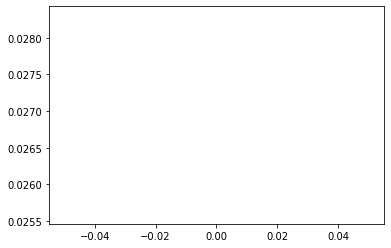

In [52]:
plt.plot(loss)